<div class="alert alert-block alert-success">
    <h1 align="center">Zeynab Khorshidi</h1>
</div>

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import misc
from scipy import ndimage

In [5]:
image = cv2.imread('Skeleton.jpg',0)

In [6]:
laplacian = cv2.Laplacian(image,cv2.CV_64F)

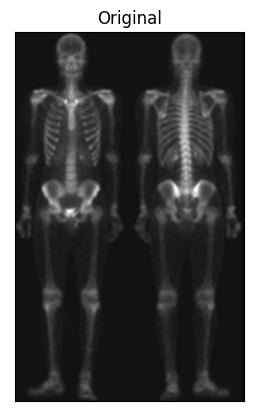

In [7]:
plt.subplot(1,1,1)
plt.imshow(image,cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.show()

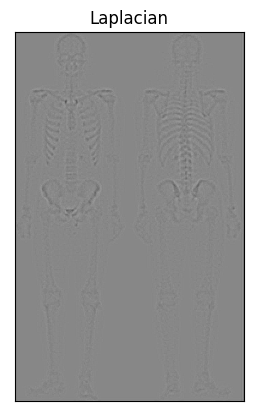

In [8]:
plt.subplot(1,1,1)
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
sum_original_and_laplacian = image + laplacian

In [10]:
print(sum_original_and_laplacian)

[[30. 30. 30. ... 24. 23. 20.]
 [27. 27. 27. ... 21. 20. 17.]
 [28. 28. 28. ... 22. 21. 18.]
 ...
 [29. 29. 29. ... 23. 23. 19.]
 [32. 32. 32. ... 28. 25. 26.]
 [30. 30. 30. ... 23. 21. 21.]]


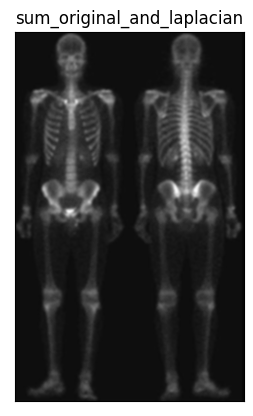

In [11]:
plt.subplot(1,1,1)
plt.imshow(sum_original_and_laplacian,cmap = 'gray')
plt.title('sum_original_and_laplacian')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
sobel = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)

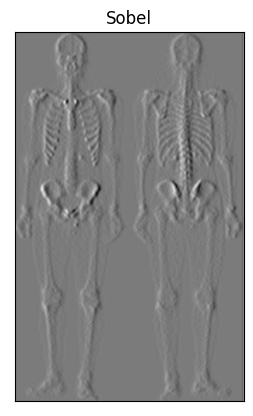

In [13]:
plt.subplot(1,1,1)
plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
print(sobel)

[[  0.   0.   0. ... 272. 368.   0.]
 [  0.   0.   0. ... 272. 368.   0.]
 [  0.   0.   0. ... 272. 368.   0.]
 ...
 [  0.   0.   0. ... 310. 382.   0.]
 [  0.   0.   0. ... 340. 391.   0.]
 [  0.   0.   0. ... 356. 396.   0.]]


In [15]:
mask_5 = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
])

In [16]:
sobel_padding_5 = np.pad(sobel, (2, 2))       

In [21]:
print('Height of image:',(sobel_padding_5.shape[0],'pixels'))
print('Width of image:',(sobel_padding_5.shape[1],'pixels'))

Height of image: (1214, 'pixels')
Width of image: (753, 'pixels')


In [22]:
sum_mask_5 = np.sum(mask_5)
print(sum_mask_5)

25


In [23]:
zarib_5 = 1/sum_mask_5
print(zarib_5)

0.04


In [24]:
for i in range(100):
    for j in range(100):
        sobel_padding_5[i+2][j+2] = ((sobel_padding_5[i][j] * zarib_5) 
        + (sobel_padding_5[i][j+1] * zarib_5)
        + (sobel_padding_5[i][j+2] * zarib_5)
        + (sobel_padding_5[i][j+3] * zarib_5)
        + (sobel_padding_5[i][j+4] * zarib_5)
        + (sobel_padding_5[i+1][j] * zarib_5)
        + (sobel_padding_5[i+1][j+1] * zarib_5)
        + (sobel_padding_5[i+1][j+2] * zarib_5)
        + (sobel_padding_5[i+1][j+3] * zarib_5)
        + (sobel_padding_5[i+1][j+4] * zarib_5) 
        + (sobel_padding_5[i+2][j] * zarib_5)
        + (sobel_padding_5[i+2][j+1] * zarib_5)
        + (sobel_padding_5[i+2][j+2] * zarib_5)
        + (sobel_padding_5[i+2][j+3] * zarib_5)
        + (sobel_padding_5[i+2][j+4] * zarib_5)
        + (sobel_padding_5[i+3][j] * zarib_5)
        + (sobel_padding_5[i+3][j+1] * zarib_5)
        + (sobel_padding_5[i+3][j+2] * zarib_5)
        + (sobel_padding_5[i+3][j+3] * zarib_5) 
        + (sobel_padding_5[i+3][j+4] * zarib_5)
        + (sobel_padding_5[i+4][j] * zarib_5)
        + (sobel_padding_5[i+4][j+1] * zarib_5)
        + (sobel_padding_5[i+4][j+2] * zarib_5)
        + (sobel_padding_5[i+4][j+3] * zarib_5)
        + (sobel_padding_5[i+4][j+4] * zarib_5))

In [25]:
print(sobel_padding_5)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
sobel_box_5 = sobel_padding_5[2:-2,2:-2]

In [27]:
print(sobel_box_5)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.72000000e+02
   3.68000000e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.76000000e-02 ...  2.72000000e+02
   3.68000000e+02  0.00000000e+00]
 [-2.30400000e-03 -1.41004800e-02 -1.20229478e-01 ...  2.72000000e+02
   3.68000000e+02  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.10000000e+02
   3.82000000e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.40000000e+02
   3.91000000e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.56000000e+02
   3.96000000e+02  0.00000000e+00]]


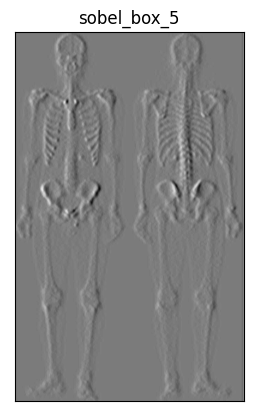

In [28]:
plt.subplot(1,1,1)
plt.imshow(sobel_box_5,cmap = 'gray')
plt.title('sobel_box_5')
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
Multiply_laplacian_and_sobel_box_5 = laplacian * sobel_box_5

In [30]:
print(Multiply_laplacian_and_sobel_box_5)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.99200000e+03
   1.84000000e+03 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  1.36000000e+03
  -3.68000000e+02 -0.00000000e+00]
 [ 4.60800000e-03  2.82009600e-02  2.40458957e-01 ...  8.16000000e+02
  -1.10400000e+03 -0.00000000e+00]
 ...
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
  -1.91000000e+03 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.40000000e+03
   3.91000000e+02 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.78000000e+03
  -1.18800000e+03 -0.00000000e+00]]


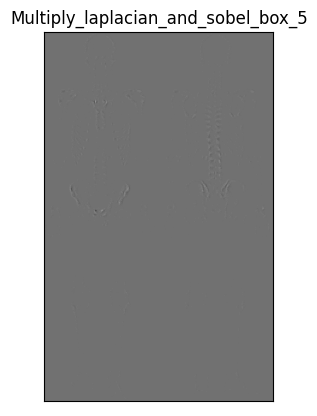

In [31]:
plt.subplot(1,1,1)
plt.imshow(Multiply_laplacian_and_sobel_box_5,cmap = 'gray')
plt.title('Multiply_laplacian_and_sobel_box_5')
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
sum_original_and_Multiply_laplacian_and_sobel_box_5 = image + Multiply_laplacian_and_sobel_box_5

In [33]:
print(sum_original_and_Multiply_laplacian_and_sobel_box_5)

[[   24.            24.            24.         ...  3005.
   1858.            22.        ]
 [   27.            27.            27.         ...  1376.
   -347.            25.        ]
 [   30.004608      30.02820096    30.24045896 ...   835.
  -1080.            28.        ]
 ...
 [   33.            33.            33.         ...    23.
  -1882.            32.        ]
 [   29.            29.            29.         ...  3418.
    415.            27.        ]
 [   28.            28.            28.         ...  1798.
  -1164.            27.        ]]


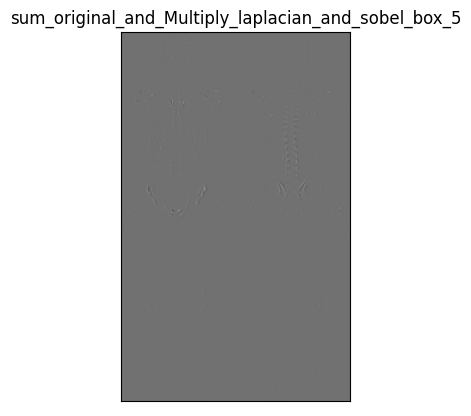

In [34]:
plt.subplot(1,1,1)
plt.imshow(sum_original_and_Multiply_laplacian_and_sobel_box_5,cmap = 'gray')
plt.title('sum_original_and_Multiply_laplacian_and_sobel_box_5')
plt.xticks([])
plt.yticks([])
plt.show()

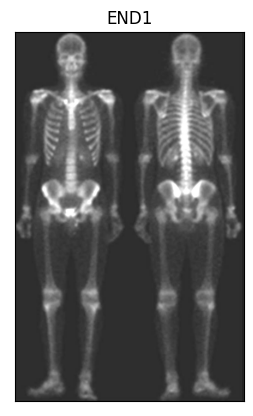

In [35]:
end1 = Image.open("Skeleton.jpg")

enhancer = ImageEnhance.Brightness(end1)

factor = 1.5
im_output = enhancer.enhance(factor)
plt.subplot(1,1,1)
plt.imshow(im_output,cmap = 'gray')
plt.title('END1')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
end2 = sum_original_and_Multiply_laplacian_and_sobel_box_5

enhancer = ImageEnhance.Brightness(end2)

factor = 1.5
im_output = enhancer.enhance(factor)
plt.subplot(1,1,1)
plt.imshow(im_output,cmap = 'gray')
plt.title('END2')
plt.xticks([])
plt.yticks([])
plt.show()